In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
%matplotlib inline

In [3]:
data_df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")

In [4]:
data_df.head(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.00,0.35,0.0,0.0031,0.00,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.00,0.35,0.0,0.0035,0.00,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.00,0.35,0.0,0.0028,0.00,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.00,0.35,0.0,0.0020,0.00,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.00,0.35,0.0,0.0041,0.00,0.00
5,2020-9-4-5,Format1,300,250,75000,Inter219,Video,Desktop,Display,490,64,64,2,0.00,0.35,0.0,0.0313,0.01,0.00
6,2020-9-4-6,Format1,300,250,75000,Inter221,App,Mobile,Video,1197,202,202,1,0.01,0.35,0.0,0.0050,0.03,0.01
7,2020-9-6-7,Format1,300,250,75000,Inter228,Video,Mobile,Video,1363,198,196,1,0.00,0.35,0.0,0.0051,0.00,0.00
8,2020-9-8-6,Format1,300,250,75000,Inter223,Web,Mobile,Video,1402,137,136,1,0.00,0.35,0.0,0.0074,0.02,0.00
9,2020-9-11-17,Format1,300,250,75000,Inter228,Video,Mobile,Display,1816,312,311,1,0.00,0.35,0.0,0.0032,0.00,0.00


In [5]:
data_df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,NaN,NaN,NaN
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,NaN,NaN,NaN
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,NaN,NaN,NaN
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,NaN,NaN,NaN
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [6]:
data_df.shape

(23066, 19)

In [7]:
data_df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [9]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,18330.000000,18330.000000,18330.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,0.073661,7.672045,0.351061
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,0.075160,6.481391,0.343334
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.000100,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.002600,1.710000,0.090000
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,0.082550,7.660000,0.160000
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,0.130000,12.510000,0.570000
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,1.000000,81.560000,7.260000


In [10]:
data_df.duplicated().sum()

0

In [11]:
data_df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [12]:
def calculate_CTR(x):
    Total_Measured_Clicks=data_df.Clicks
    Total_Measured_Ad_Impressions=data_df.Impressions
    CTR = (Total_Measured_Clicks/Total_Measured_Ad_Impressions)*100
    return CTR

In [13]:
data_df['CTR']= data_df[['CTR']].apply(lambda x: calculate_CTR(x))

In [14]:
def calculate_CPM(y):
    Total_Campaign_Spend=data_df.Spend
    Number_of_Impressions=data_df.Impressions
    CPM = (Total_Campaign_Spend/Number_of_Impressions)*1000
    return CPM

In [15]:
data_df['CPM']= data_df[['CPM']].apply(lambda y: calculate_CPM(y))

In [16]:
def calculate_CPC(z):
    Total_Cost_spend=data_df.Spend
    Number_of_Clicks=data_df.Clicks
    CPC = (Total_Cost_spend/Number_of_Clicks)
    return CPC

In [17]:
data_df['CPC']= data_df[['CPC']].apply(lambda z: calculate_CPC(z))

In [18]:
data_df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23-4,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,50.0,50.0,0.10
23057,2020-11-20-2,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,50.0,35.0,0.07
23058,2020-11-4-3,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,100.0,80.0,0.08
23059,2020-11-13-4,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,50.0,35.0,0.07
23060,2020-11-16-5,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,25.0,35.0,0.14
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


In [19]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,96674.468048,2.432044e+06,1.295099e+06,1.241520e+06,10678.518816,2706.625689,0.335123,1924.252331,8.409941,8.396849,0.336678
std,233.651434,203.092885,61538.329557,4.742888e+06,2.512970e+06,2.429400e+06,17353.409363,4067.927273,0.031963,3105.238410,9.262048,9.057760,0.341253
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.210000,0.000000,0.010874,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.265107,1.749084,0.089736
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,9.391248,8.371566,0.139347
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,13.470571,13.042018,0.546242
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,200.000000,715.000000,7.264000


In [20]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

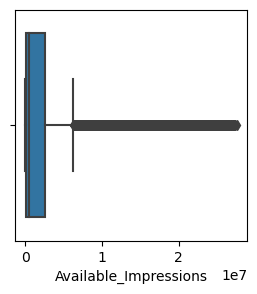

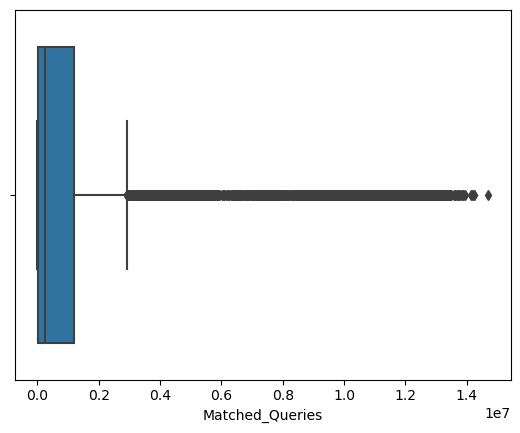

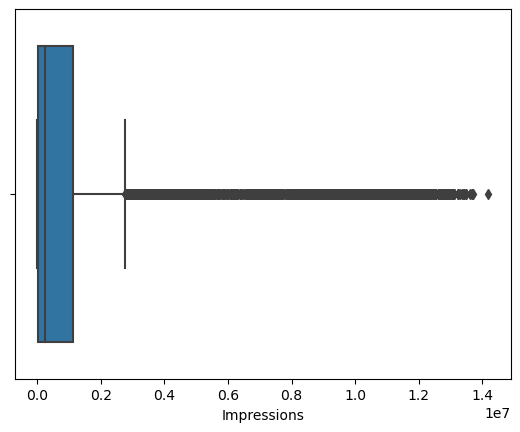

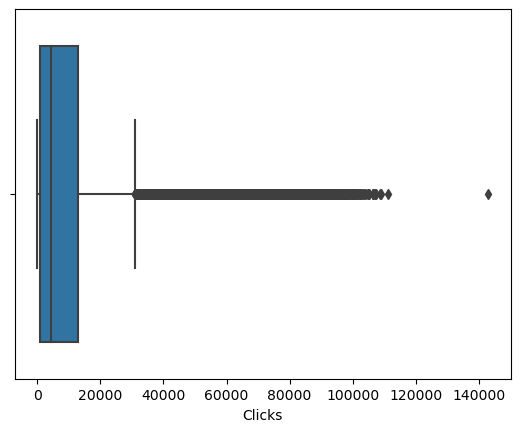

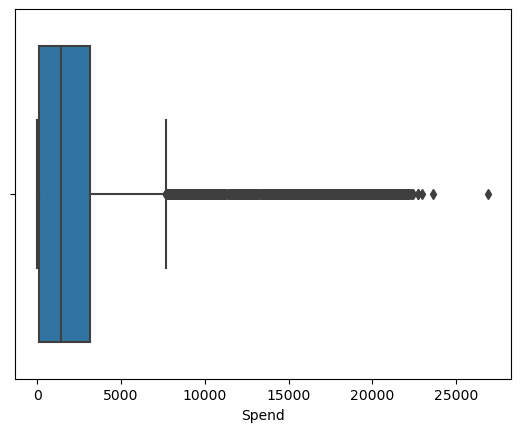

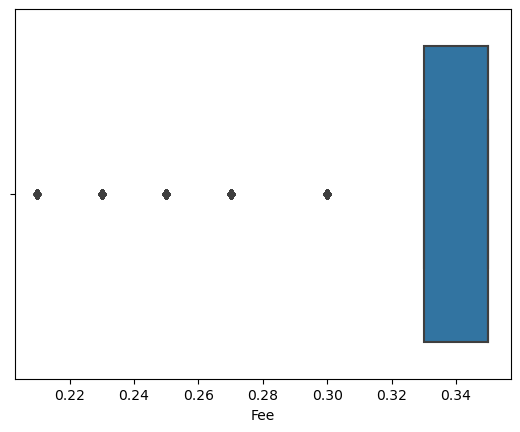

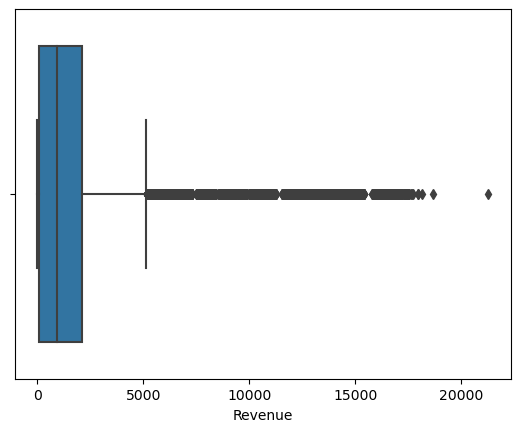

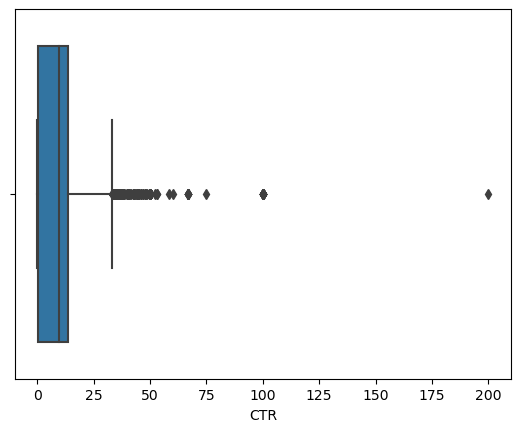

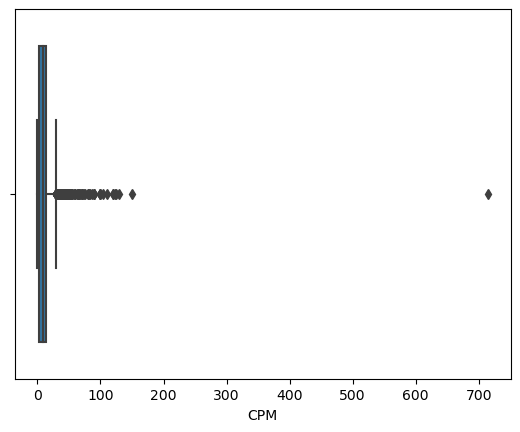

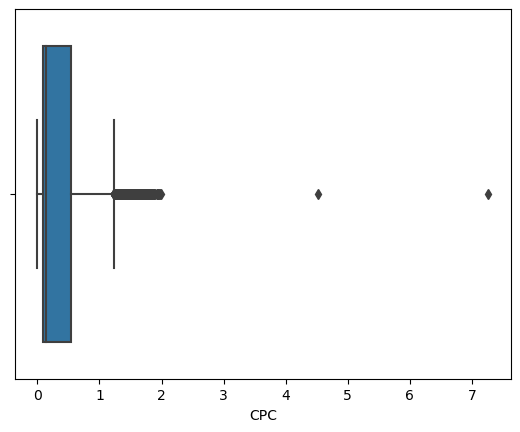

In [21]:
plt.figure(figsize=(3,3))
sns.boxplot(data=data_df, x='Available_Impressions');
plt.show()
sns.boxplot(data=data_df, x='Matched_Queries');
plt.show()
sns.boxplot(data=data_df, x='Impressions');
plt.show()
sns.boxplot(data=data_df, x='Clicks');
plt.show()
sns.boxplot(data=data_df, x='Spend');
plt.show()
sns.boxplot(data=data_df, x='Fee');
plt.show()
sns.boxplot(data=data_df, x='Revenue');
plt.show()
sns.boxplot(data=data_df, x='CTR');
plt.show()
sns.boxplot(data=data_df, x='CPM');
plt.show()
sns.boxplot(data=data_df, x='CPC');
plt.show()

The K-means clustering algorithm is sensitive to outliers. So it is better to identify and remove outliers before applying K-means clustering algorithm.

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
lr,ur=remove_outlier(data_df['Available_Impressions'])
print("lower range",lr, "and upper range", ur)

lower range -3707387.0 and upper range 6268771.0


In [24]:
data_df['Available_Impressions']=np.where(data_df['Available_Impressions']>ur,ur,data_df['Available_Impressions'])
data_df['Available_Impressions']=np.where(data_df['Available_Impressions']<lr,lr,data_df['Available_Impressions'])

In [25]:
lr,ur=remove_outlier(data_df['Matched_Queries'])
print("lower range",lr, "and upper range", ur)

lower range -1725343.75 and upper range 2924326.25


In [26]:
data_df['Matched_Queries']=np.where(data_df['Matched_Queries']>ur,ur,data_df['Matched_Queries'])
data_df['Matched_Queries']=np.where(data_df['Matched_Queries']<lr,lr,data_df['Matched_Queries'])

In [27]:
lr,ur=remove_outlier(data_df['Impressions'])
print("lower range",lr, "and upper range", ur)

lower range -1648666.5 and upper range 2769085.5


In [28]:
data_df['Impressions']=np.where(data_df['Impressions']>ur,ur,data_df['Impressions'])
data_df['Impressions']=np.where(data_df['Impressions']<lr,lr,data_df['Impressions'])

In [29]:
lr,ur=remove_outlier(data_df['Clicks'])
print("lower range",lr, "and upper range", ur)

lower range -17415.625 and upper range 30919.375


In [30]:
data_df['Clicks']=np.where(data_df['Clicks']>ur,ur,data_df['Clicks'])
data_df['Clicks']=np.where(data_df['Clicks']<lr,lr,data_df['Clicks'])

In [31]:
lr,ur=remove_outlier(data_df['Spend'])
print("lower range",lr, "and upper range", ur)

lower range -4469.15 and upper range 7675.73


In [32]:
data_df['Spend']=np.where(data_df['Spend']>ur,ur,data_df['Spend'])
data_df['Spend']=np.where(data_df['Spend']<lr,lr,data_df['Spend'])

In [33]:
lr,ur=remove_outlier(data_df['Fee'])
print("lower range",lr, "and upper range", ur)

lower range 0.30000000000000004 and upper range 0.3799999999999999


In [34]:
data_df['Fee']=np.where(data_df['Fee']>ur,ur,data_df['Fee'])
data_df['Fee']=np.where(data_df['Fee']<lr,lr,data_df['Fee'])

In [35]:
lr,ur=remove_outlier(data_df['Revenue'])
print("lower range",lr, "and upper range", ur)

lower range -2998.5937874999995 and upper range 5145.297312499999


In [36]:
data_df['Revenue']=np.where(data_df['Revenue']>ur,ur,data_df['Revenue'])
data_df['Revenue']=np.where(data_df['Revenue']<lr,lr,data_df['Revenue'])

In [37]:
lr,ur=remove_outlier(data_df['CTR'])
print("lower range",lr, "and upper range", ur)

lower range -19.543087778859437 and upper range 33.27876617457427


In [38]:
data_df['CTR']=np.where(data_df['CTR']>ur,ur,data_df['CTR'])
data_df['CTR']=np.where(data_df['CTR']<lr,lr,data_df['CTR'])

In [39]:
lr,ur=remove_outlier(data_df['CPM'])
print("lower range",lr, "and upper range", ur)

lower range -15.19031633320633 and upper range 29.981418178163874


In [40]:
data_df['CPM']=np.where(data_df['CPM']>ur,ur,data_df['CPM'])
data_df['CPM']=np.where(data_df['CPM']<lr,lr,data_df['CPM'])

In [41]:
lr,ur=remove_outlier(data_df['CPC'])
print("lower range",lr, "and upper range", ur)

lower range -0.5950238218287072 and upper range 1.2310015773280991


In [42]:
data_df['CPC']=np.where(data_df['CPC']>ur,ur,data_df['CPC'])
data_df['CPC']=np.where(data_df['CPC']<lr,lr,data_df['CPC'])

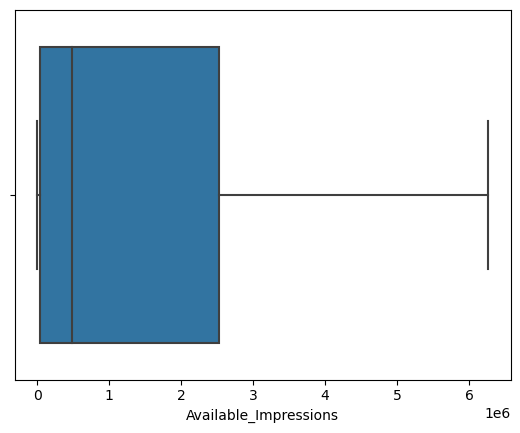

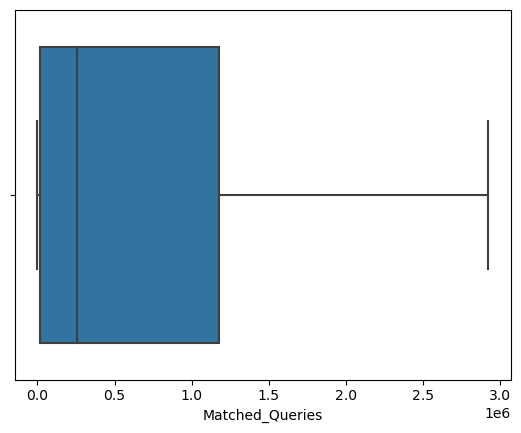

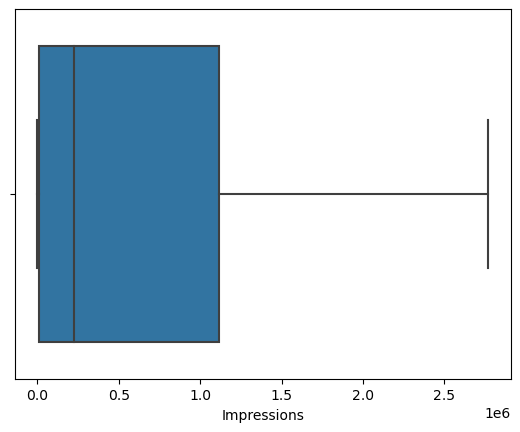

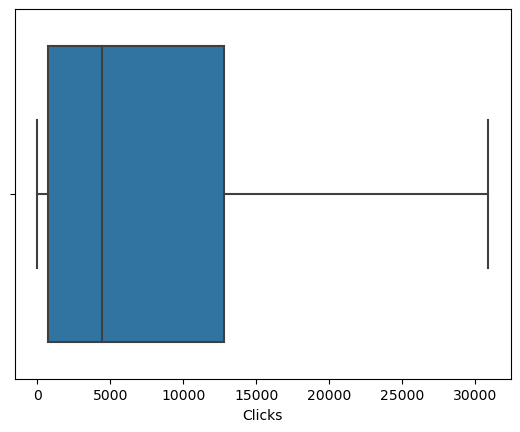

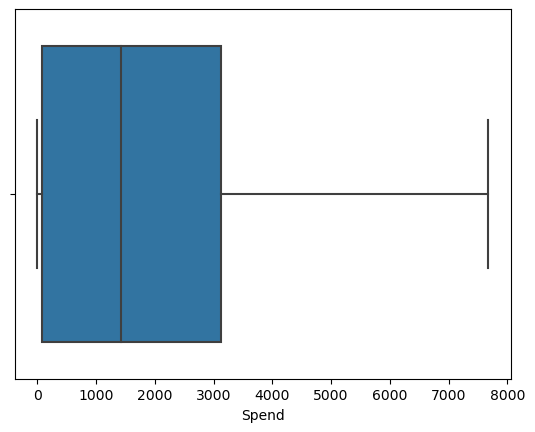

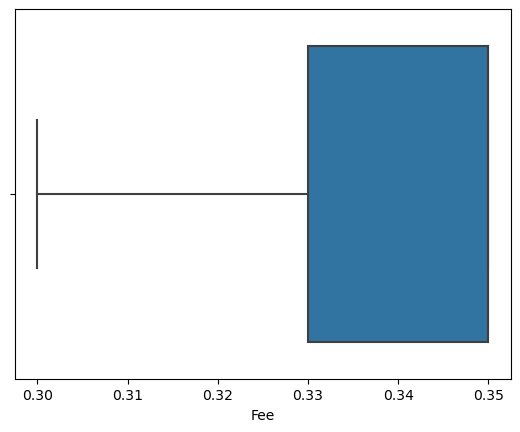

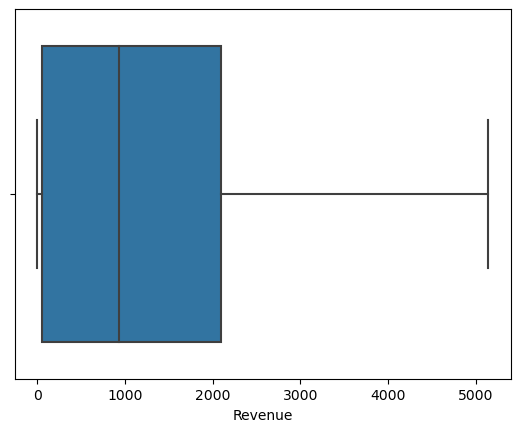

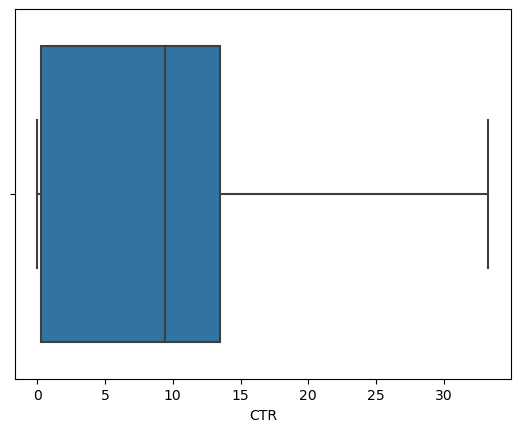

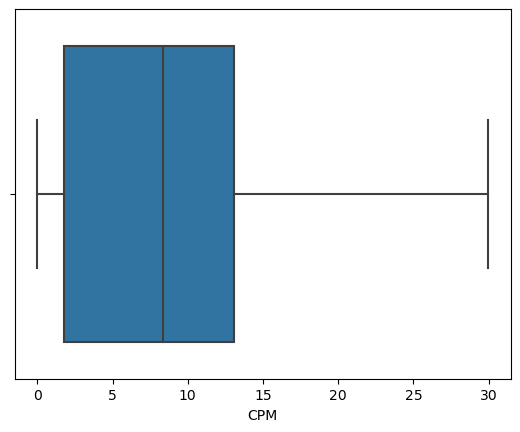

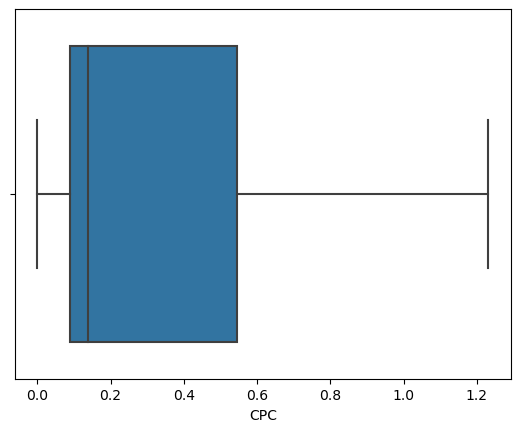

In [43]:
sns.boxplot(data=data_df, x='Available_Impressions');
plt.show()
sns.boxplot(data=data_df, x='Matched_Queries');
plt.show()
sns.boxplot(data=data_df, x='Impressions');
plt.show()
sns.boxplot(data=data_df, x='Clicks');
plt.show()
sns.boxplot(data=data_df, x='Spend');
plt.show()
sns.boxplot(data=data_df, x='Fee');
plt.show()
sns.boxplot(data=data_df, x='Revenue');
plt.show()
sns.boxplot(data=data_df, x='CTR');
plt.show()
sns.boxplot(data=data_df, x='CPM');
plt.show()
sns.boxplot(data=data_df, x='CPC');
plt.show()

In [44]:
data_df.describe()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,23066.000000,23066.000000,23066.000000,2.306600e+04,2.306600e+04,2.306600e+04,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000,23066.000000
mean,385.163097,337.896037,96674.468048,1.607253e+06,7.995380e+05,7.536120e+05,8306.828194,2166.060098,0.340288,1449.388572,8.223203,8.219181,0.330035
std,233.651434,203.092885,61538.329557,2.125528e+06,1.026037e+06,9.802568e+05,9574.779384,2425.189632,0.018129,1646.893583,8.253522,6.881016,0.316568
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.000000,0.300000,0.000000,0.010874,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,3.367225e+04,1.828250e+04,7.990500e+03,710.000000,85.180000,0.330000,55.365375,0.265107,1.749084,0.089736
50%,300.000000,300.000000,72000.000000,4.837710e+05,2.580875e+05,2.252900e+05,4425.000000,1425.125000,0.350000,926.335000,9.391248,8.371566,0.139347
75%,720.000000,600.000000,84000.000000,2.527712e+06,1.180700e+06,1.112428e+06,12793.750000,3121.400000,0.350000,2091.338150,13.470571,13.042018,0.546242
max,728.000000,600.000000,216000.000000,6.268771e+06,2.924326e+06,2.769086e+06,30919.375000,7675.730000,0.350000,5145.297312,33.278766,29.981418,1.231002


In [45]:
data_df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


In [46]:
data_df['Platform'].value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [47]:
data_df['Device Type'].value_counts()

Mobile     14806
Desktop     8260
Name: Device Type, dtype: int64

In [48]:
data_df['Format'].value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

In [49]:
df1=data_df.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Platform']= label_encoder.fit_transform(data_df['Platform'])
df1['Device Type']= label_encoder.fit_transform(data_df['Device Type'])
df1['Format']= label_encoder.fit_transform(data_df['Format'])

In [50]:
df1['Platform'].value_counts()

1    9873
2    8251
0    4942
Name: Platform, dtype: int64

In [51]:
df1['Device Type'].value_counts()

1    14806
0     8260
Name: Device Type, dtype: int64

In [52]:
df1['Format'].value_counts()

1    11552
0    11514
Name: Format, dtype: int64

In [53]:
df1

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,1,0,0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.309598,0.000000,0.00
1,2020-9-2-10,Format1,300,250,75000,Inter227,0,1,1,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.350877,0.000000,0.00
2,2020-9-1-22,Format1,300,250,75000,Inter222,1,0,0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.281690,0.000000,0.00
3,2020-9-3-20,Format1,300,250,75000,Inter228,1,1,1,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.202020,0.000000,0.00
4,2020-9-4-15,Format1,300,250,75000,Inter217,2,0,1,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.413223,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,2,1,1,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07
23062,2020-11-2-7,Format5,720,300,216000,Inter224,2,0,1,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,33.278766,20.000000,0.04
23063,2020-9-14-22,Format5,720,300,216000,Inter218,0,1,1,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,33.278766,29.981418,0.05
23064,2020-11-18-2,Format4,120,600,72000,inter230,1,1,1,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07


In [54]:
df2=df1.drop(['Timestamp','InventoryType',], axis=1)

In [55]:
df2

,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,Inter222,1,0,0,1806.0,325.0,323.0,1.0,0.00,0.35,0.0000,0.309598,0.000000,0.00
1,300,250,75000,Inter227,0,1,1,1780.0,285.0,285.0,1.0,0.00,0.35,0.0000,0.350877,0.000000,0.00
2,300,250,75000,Inter222,1,0,0,2727.0,356.0,355.0,1.0,0.00,0.35,0.0000,0.281690,0.000000,0.00
3,300,250,75000,Inter228,1,1,1,2430.0,497.0,495.0,1.0,0.00,0.35,0.0000,0.202020,0.000000,0.00
4,300,250,75000,Inter217,2,0,1,1218.0,242.0,242.0,1.0,0.00,0.35,0.0000,0.413223,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,Inter220,2,1,1,1.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07
23062,720,300,216000,Inter224,2,0,1,3.0,2.0,2.0,1.0,0.04,0.35,0.0260,33.278766,20.000000,0.04
23063,720,300,216000,Inter218,0,1,1,2.0,1.0,1.0,1.0,0.05,0.35,0.0325,33.278766,29.981418,0.05
23064,120,600,72000,inter230,1,1,1,7.0,1.0,1.0,1.0,0.07,0.35,0.0455,33.278766,29.981418,0.07


In [56]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
scaled_df = X.fit_transform(df2.iloc[:, 4:])
scaled_df

array([[-0.19319511, -1.33884052, -1.00164881, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-1.53989756,  0.74691495,  0.99835391, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.19319511, -1.33884052, -1.00164881, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [-1.53989756,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-0.19319511,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.82143521],
       [-1.53989756,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

In [57]:
scaled_df

array([[-0.19319511, -1.33884052, -1.00164881, ..., -0.95883633,
        -1.19449791, -1.04256138],
       [-1.53989756,  0.74691495,  0.99835391, ..., -0.95383476,
        -1.19449791, -1.04256138],
       [-0.19319511, -1.33884052, -1.00164881, ..., -0.96221767,
        -1.19449791, -1.04256138],
       ...,
       [-1.53989756,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.88461411],
       [-0.19319511,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.82143521],
       [-1.53989756,  0.74691495,  0.99835391, ...,  3.03580766,
         3.16271759, -0.7582563 ]])

df3=df1.drop(['Timestamp','InventoryType','Ad - Length','Ad- Width','Ad Size','Ad Type'],axis=1)

from scipy.cluster.hierarchy import dendrogram, linkage

wardlink = linkage(df3, method = 'ward')

dend = dendrogram(wardlink)

dend

In [58]:
from sklearn.cluster import KMeans 
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [59]:
k_means.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
k_means.inertia_

187699.29157770422

In [61]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

149277.87993930018

In [62]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

117993.54292608675

In [63]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

106130.72609577642

In [64]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

98058.08541713952

In [65]:
k_means = KMeans(n_clusters = 7)
k_means.fit(scaled_df)
k_means.inertia_

91330.56300996421

In [66]:
k_means = KMeans(n_clusters = 8)
k_means.fit(scaled_df)
k_means.inertia_

85144.01189341066

In [67]:
k_means = KMeans(n_clusters = 9)
k_means.fit(scaled_df)
k_means.inertia_

78993.79005445469

In [68]:
k_means = KMeans(n_clusters = 10)
k_means.fit(scaled_df)
k_means.inertia_

75649.08362929773

In [69]:
k_means = KMeans(n_clusters = 11)
k_means.fit(scaled_df)
k_means.inertia_

71634.5282427017

In [70]:
k_means = KMeans(n_clusters = 12)
k_means.fit(scaled_df)
k_means.inertia_

69995.39030371432

In [71]:
k_means = KMeans(n_clusters = 13)
k_means.fit(scaled_df)
k_means.inertia_

67019.2040080323

In [72]:
k_means = KMeans(n_clusters = 14)
k_means.fit(scaled_df)
k_means.inertia_

63752.971545391585

In [73]:
k_means = KMeans(n_clusters = 15)
k_means.fit(scaled_df)
k_means.inertia_

62075.360681085105

In [74]:
k_means = KMeans(n_clusters = 16)
k_means.fit(scaled_df)
k_means.inertia_

59510.01896056231

In [75]:
k_means = KMeans(n_clusters = 17)
k_means.fit(scaled_df)
k_means.inertia_

57552.74549139133

In [76]:
wss =[]

In [77]:
for i in range(2,17):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [78]:
wss

[187697.54734795197,
 149277.89043209123,
 117993.54585010011,
 106130.72609577642,
 98059.66473349728,
 91564.14971033805,
 85143.55686557337,
 81804.10056394302,
 75438.37875477981,
 72718.10591572245,
 71142.80300467467,
 67176.24664319205,
 63955.54873052557,
 61636.11647359305,
 59552.39747425646]

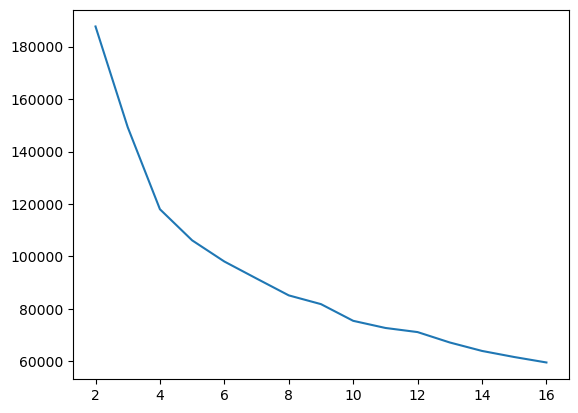

In [79]:
plt.plot(range(2,17), wss)

In [80]:
from sklearn.metrics import silhouette_samples, silhouette_score
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels3 = k_means.labels_
silhouette_score(scaled_df,labels3,random_state=1)

0.39611241092859645

In [81]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels3 = k_means.labels_
silhouette_score(scaled_df,labels3,random_state=1)

0.27444113865190317

In [82]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels4 = k_means.labels_
silhouette_score(scaled_df,labels4,random_state=1)

0.3181668799170082

In [83]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
labels5 = k_means.labels_
silhouette_score(scaled_df,labels5,random_state=1)

0.2774221150542721

In [84]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
labels6 = k_means.labels_
silhouette_score(scaled_df,labels6,random_state=1)

0.27431304420484565

In [85]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
labels7 = k_means.labels_
silhouette_score(scaled_df,labels7,random_state=1)

0.24897300249025162

In [86]:
k_means = KMeans(n_clusters = 8,random_state=1)
k_means.fit(scaled_df)
labels8 = k_means.labels_
silhouette_score(scaled_df,labels8,random_state=1)

0.24461153598479626

In [87]:
k_means = KMeans(n_clusters = 9,random_state=1)
k_means.fit(scaled_df)
labels9 = k_means.labels_
silhouette_score(scaled_df,labels9,random_state=1)

0.2454857472555275

In [88]:
k_means = KMeans(n_clusters = 10,random_state=1)
k_means.fit(scaled_df)
labels10 = k_means.labels_
silhouette_score(scaled_df,labels10,random_state=1)

0.24428485122892

In [89]:
df1["Clus_kmeans4"] = labels4
df1.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans4
0,2020-9-2-17,Format1,300,250,75000,Inter222,1,0,0,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0,2
1,2020-9-2-10,Format1,300,250,75000,Inter227,0,1,1,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0,2
2,2020-9-1-22,Format1,300,250,75000,Inter222,1,0,0,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0,2
3,2020-9-3-20,Format1,300,250,75000,Inter228,1,1,1,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0,2
4,2020-9-4-15,Format1,300,250,75000,Inter217,2,0,1,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0,2


In [90]:
df1.Clus_kmeans4.value_counts().sort_index()

0    11079
1     4019
2     6338
3     1630
Name: Clus_kmeans4, dtype: int64

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  int32  
 7   Device Type            23066 non-null  int32  
 8   Format                 23066 non-null  int32  
 9   Available_Impressions  23066 non-null  float64
 10  Matched_Queries        23066 non-null  float64
 11  Impressions            23066 non-null  float64
 12  Clicks                 23066 non-null  float64
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [92]:
clust_profile=df1.drop(['Timestamp','InventoryType','Ad - Length','Ad- Width','Ad Size','Ad Type'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans4').mean()
clust_profile['freq']=df1.Clus_kmeans4.value_counts().sort_index()
clust_profile

,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,freq
Clus_kmeans4,,,,,,,,,,,,,,
0,1.146403,0.641935,0.502031,1.193196e+05,6.628226e+04,5.431958e+04,6820.610073,622.067598,0.349969,404.439811,14.782707,13.283658,0.096843,11079
1,1.143319,0.637970,0.491665,5.712547e+06,2.813464e+06,2.677645e+06,11301.797213,5760.596099,0.313105,3893.376883,0.216972,1.571892,0.749124,4019
2,1.139634,0.645314,0.507573,1.815029e+06,8.675710e+05,8.296554e+05,3262.323446,1505.121010,0.349180,980.978928,0.405315,1.789722,0.528412,6338
3,1.138650,0.638037,0.488957,7.905358e+05,5.532682e+05,4.669922e+05,30638.792101,6367.584429,0.306939,4347.166865,13.777850,15.186061,0.110335,1630


In [93]:
pd.set_option('display.max_rows', None)
df1.groupby(['Device Type', 'Clicks']).Clus_kmeans4.mean()

Device Type  Clicks   
0            1.000        0.825688
             2.000        0.392157
             3.000        0.322581
             4.000        0.100000
             5.000        0.181818
             6.000        0.000000
             7.000        0.000000
             8.000        0.000000
             9.000        0.000000
             10.000       0.000000
             11.000       0.000000
             12.000       0.000000
             13.000       0.000000
             14.000       0.000000
             15.000       0.000000
             16.000       0.000000
             17.000       0.000000
             18.000       0.000000
             19.000       0.000000
             21.000       0.000000
             22.000       0.000000
             23.000       0.000000
             24.000       0.000000
             25.000       0.000000
             26.000       0.000000
             27.000       0.000000
             28.000       0.400000
             29.000       0.0000

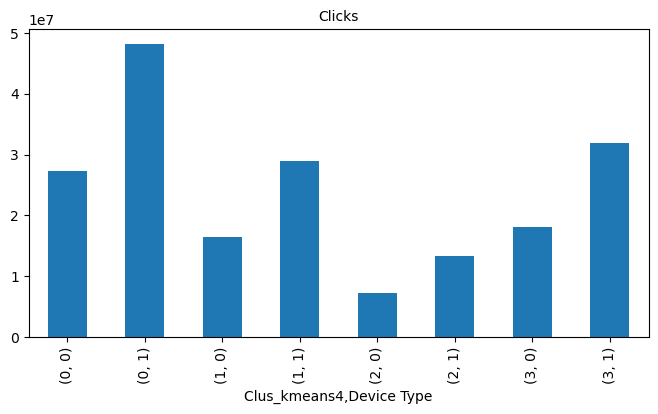

In [94]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['Clicks'].plot(kind='bar',figsize=(8,4))
plt.title('Clicks',fontsize=10)
plt.show()

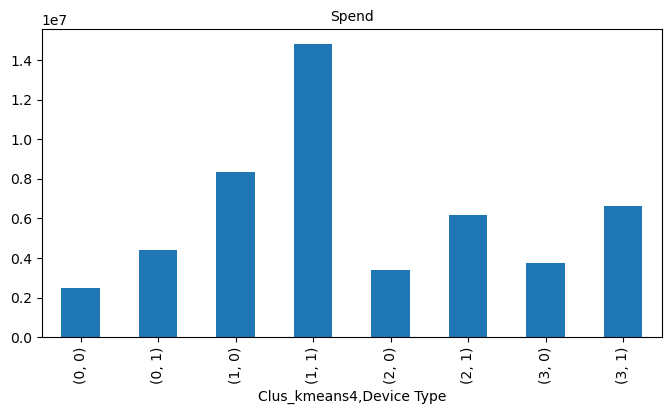

In [95]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['Spend'].plot(kind='bar',figsize=(8,4))
plt.title('Spend',fontsize=10)
plt.show()

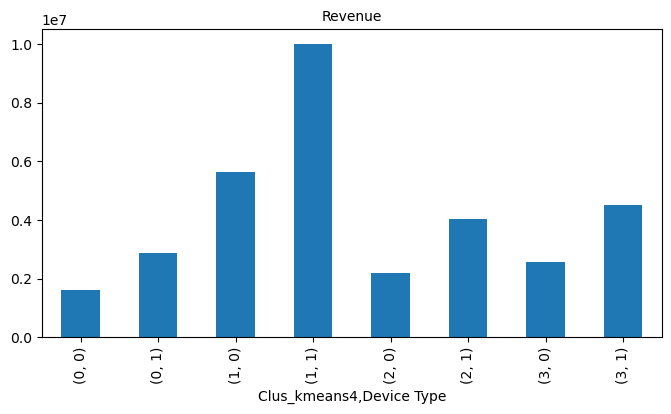

In [96]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['Revenue'].plot(kind='bar',figsize=(8,4))
plt.title('Revenue',fontsize=10)
plt.show()

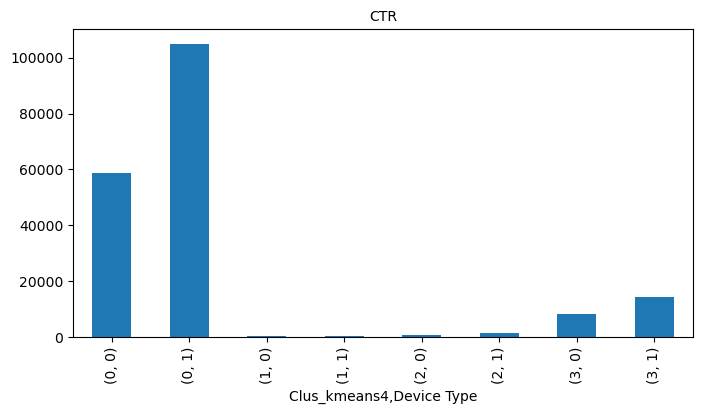

In [97]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['CTR'].plot(kind='bar',figsize=(8,4))
plt.title('CTR',fontsize=10)
plt.show()

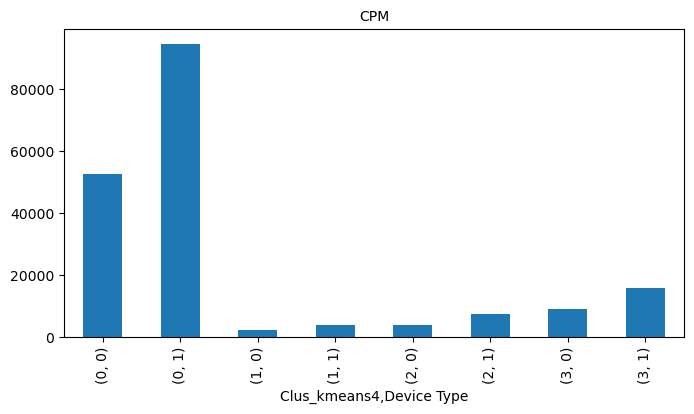

In [98]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['CPM'].plot(kind='bar',figsize=(8,4))
plt.title('CPM',fontsize=10)
plt.show()

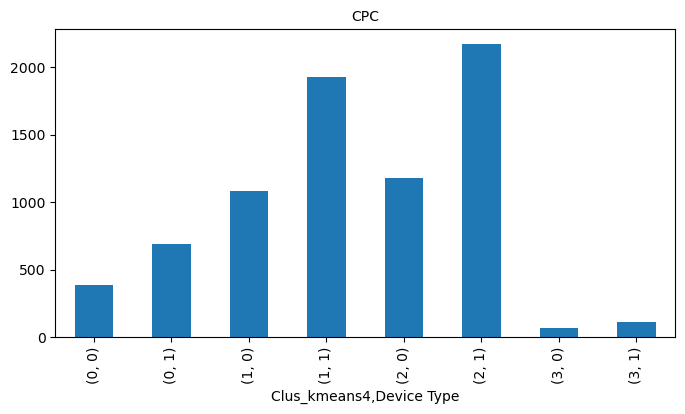

In [99]:
df1.groupby(['Clus_kmeans4','Device Type']).sum()['CPC'].plot(kind='bar',figsize=(8,4))
plt.title('CPC',fontsize=10)
plt.show()

#### Cluster 0: has very low revenue and low spend when compare to other cluster and medium click rate. Here CTR is very high high and CPC is very low when compare to other cluster
#### Cluster 1: has more or less high revenue, spend  and clicks when compare to other clusters. Here CTR and CPM is very low when compare to other cluster
#### Cluster 2: has medium revenue, medium spend and very low clicks
#### Cluster 3: has high revenue, high click rate, high spend and high CPM

In [100]:
data = pd.read_excel('PCA India Data_Census.xlsx')

In [101]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [102]:
data.shape

(640, 61)

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [105]:
data.duplicated().sum()

0

In [106]:
data.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


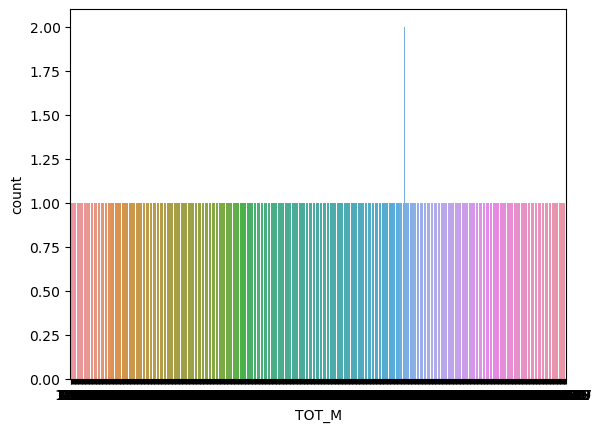

In [107]:
sns.countplot(data=data, x='TOT_M')
plt.show()

<AxesSubplot:xlabel='TOT_M', ylabel='Count'>

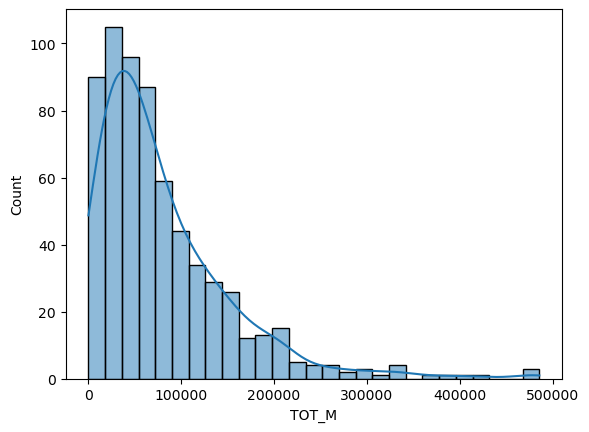

In [108]:
sns.histplot(data['TOT_M'], kde=True)

In [141]:
data1 = data.groupby('State')['TOT_M'].sum()
data1

State
Andaman & Nicobar Island      18726
Andhra Pradesh              3274363
Arunachal Pradesh             50582
Assam                       1437268
Bihar                       4025198
Chandigarh                    41753
Chhattisgarh                 838404
Dadara & Nagar Havelli         6982
Daman & Diu                   13153
Goa                          118979
Gujarat                     1983685
Haryana                     1167816
Himachal Pradesh             483381
Jammu & Kashmir              421213
Jharkhand                   1202623
Karnataka                   3409482
Kerala                      2919825
Lakshadweep                   12823
Madhya Pradesh              2155608
Maharashtra                 4196130
Manipur                      145524
Meghalaya                    268036
Mizoram                       59534
NCT of Delhi                 833414
Nagaland                      73506
Odisha                      1460031
Puducherry                    70386
Punjab                

In [160]:
data2 = data.groupby('State')['TOT_F'].sum()
data2

State
Andaman & Nicobar Island       28691
Andhra Pradesh               6097235
Arunachal Pradesh              88066
Assam                        2093432
Bihar                        5405883
Chandigarh                     59644
Chhattisgarh                 1526592
Dadara & Nagar Havelli         10831
Daman & Diu                    18706
Goa                           191393
Gujarat                      2939472
Haryana                      1498873
Himachal Pradesh              752062
Jammu & Kashmir               572959
Jharkhand                    1763884
Karnataka                    5345675
Kerala                       4856357
Lakshadweep                    14772
Madhya Pradesh               3369745
Maharashtra                  7138557
Manipur                       226963
Meghalaya                     356355
Mizoram                        95463
NCT of Delhi                 1075266
Nagaland                      125935
Odisha                       2536980
Puducherry                    11

In [161]:
data3 = data.groupby('State')['M_LIT'].sum()
data3

State
Andaman & Nicobar Island      15488
Andhra Pradesh              2372971
Arunachal Pradesh             33965
Assam                       1023294
Bihar                       2408492
Chandigarh                    33552
Chhattisgarh                 614878
Dadara & Nagar Havelli         5119
Daman & Diu                   10880
Goa                           99381
Gujarat                     1509399
Haryana                      874982
Himachal Pradesh             387845
Jammu & Kashmir              283106
Jharkhand                    799838
Karnataka                   2554163
Kerala                      2370331
Lakshadweep                   10601
Madhya Pradesh              1537129
Maharashtra                 3308633
Manipur                      110260
Meghalaya                    163712
Mizoram                       48512
NCT of Delhi                 659926
Nagaland                      55831
Odisha                      1076443
Puducherry                    58230
Punjab                

In [162]:
data4 = data.groupby('State')['F_LIT'].sum()
data4

State
Andaman & Nicobar Island      20237
Andhra Pradesh              2678603
Arunachal Pradesh             45307
Assam                       1152979
Bihar                       2197931
Chandigarh                    43438
Chhattisgarh                 703825
Dadara & Nagar Havelli         5308
Daman & Diu                   12520
Goa                          139749
Gujarat                     1722877
Haryana                      826676
Himachal Pradesh             492442
Jammu & Kashmir              288053
Jharkhand                    768942
Karnataka                   2905370
Kerala                      3878204
Lakshadweep                   11334
Madhya Pradesh              1656596
Maharashtra                 4619012
Manipur                      133868
Meghalaya                    220041
Mizoram                       79412
NCT of Delhi                 742160
Nagaland                      84327
Odisha                      1294343
Puducherry                    78314
Punjab                

In [163]:
data5 = data.groupby('State')['M_ILL'].sum()
data5

State
Andaman & Nicobar Island       3238
Andhra Pradesh               901392
Arunachal Pradesh             16617
Assam                        413974
Bihar                       1616706
Chandigarh                     8201
Chhattisgarh                 223526
Dadara & Nagar Havelli         1863
Daman & Diu                    2273
Goa                           19598
Gujarat                      474286
Haryana                      292834
Himachal Pradesh              95536
Jammu & Kashmir              138107
Jharkhand                    402785
Karnataka                    855319
Kerala                       549494
Lakshadweep                    2222
Madhya Pradesh               618479
Maharashtra                  887497
Manipur                       35264
Meghalaya                    104324
Mizoram                       11022
NCT of Delhi                 173488
Nagaland                      17675
Odisha                       383588
Puducherry                    12156
Punjab                

In [109]:
df_num = data.select_dtypes(include = ['int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

In [110]:
df_num.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,7707,23388,29796,5862,6196,3,0,1999,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,6218,19585,23102,4482,3733,7,6,427,...,525,715,123,229,186,148,76,178,140,160
2,1,3,4452,6546,10964,1082,1018,3,6,5806,...,114,188,44,89,3,34,0,4,67,61
3,1,4,1320,2784,4206,563,677,0,0,2666,...,194,247,61,128,13,50,4,10,116,59
4,1,5,11654,20591,29981,5157,4587,20,33,7670,...,874,1928,465,1043,205,302,24,105,180,478


In [111]:
df_num.drop(['State Code', 'Dist.Code'], axis = 1, inplace=True)

In [112]:
df_num.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


In [113]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

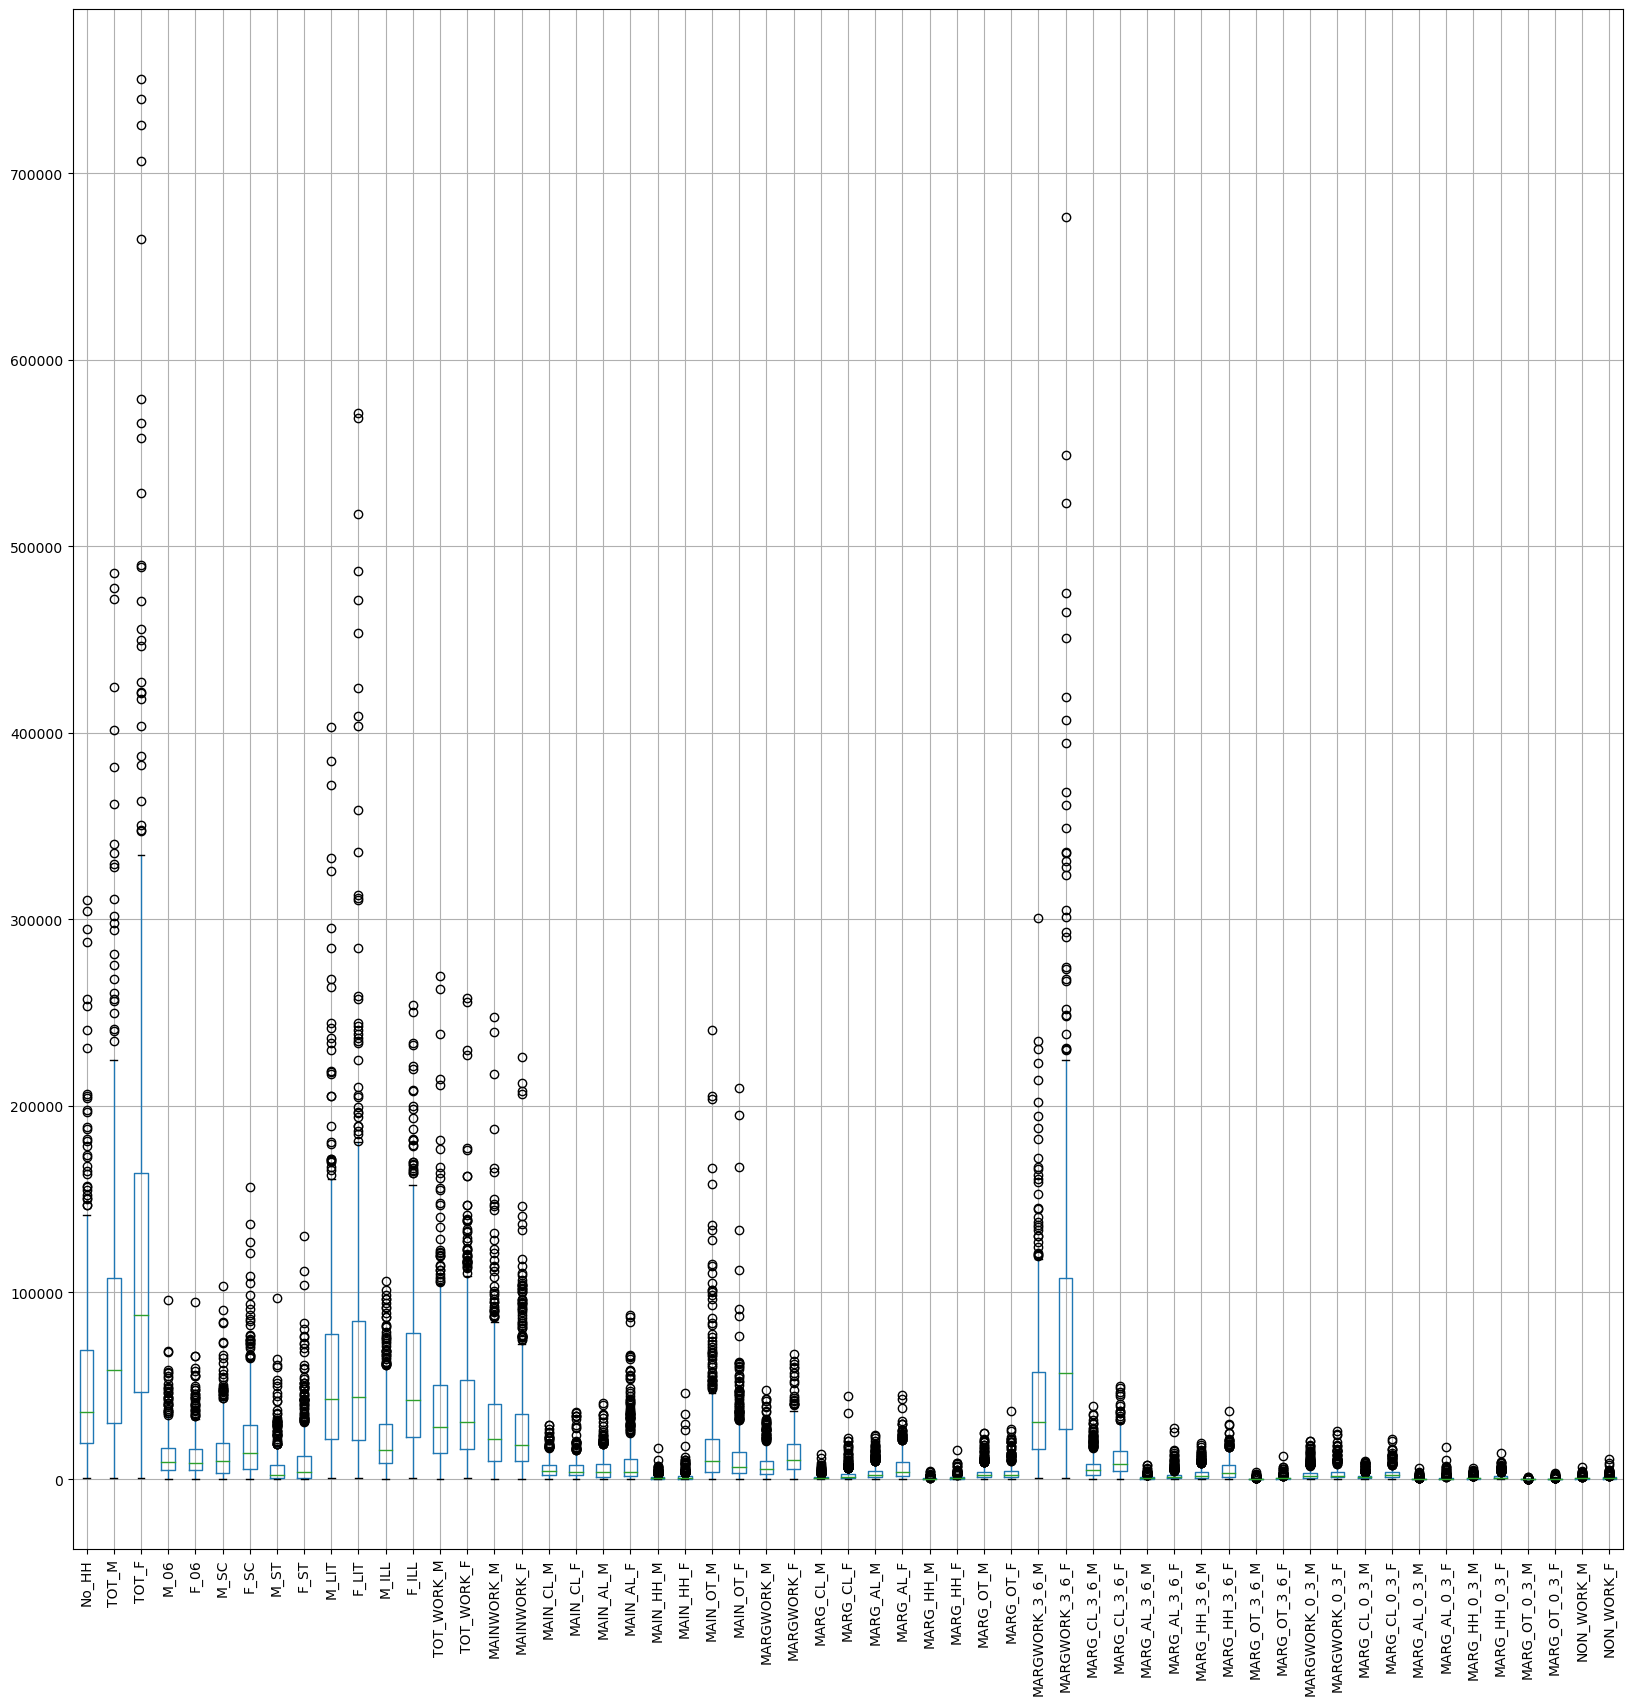

In [114]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [115]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [116]:
feature_list =df_num.columns
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

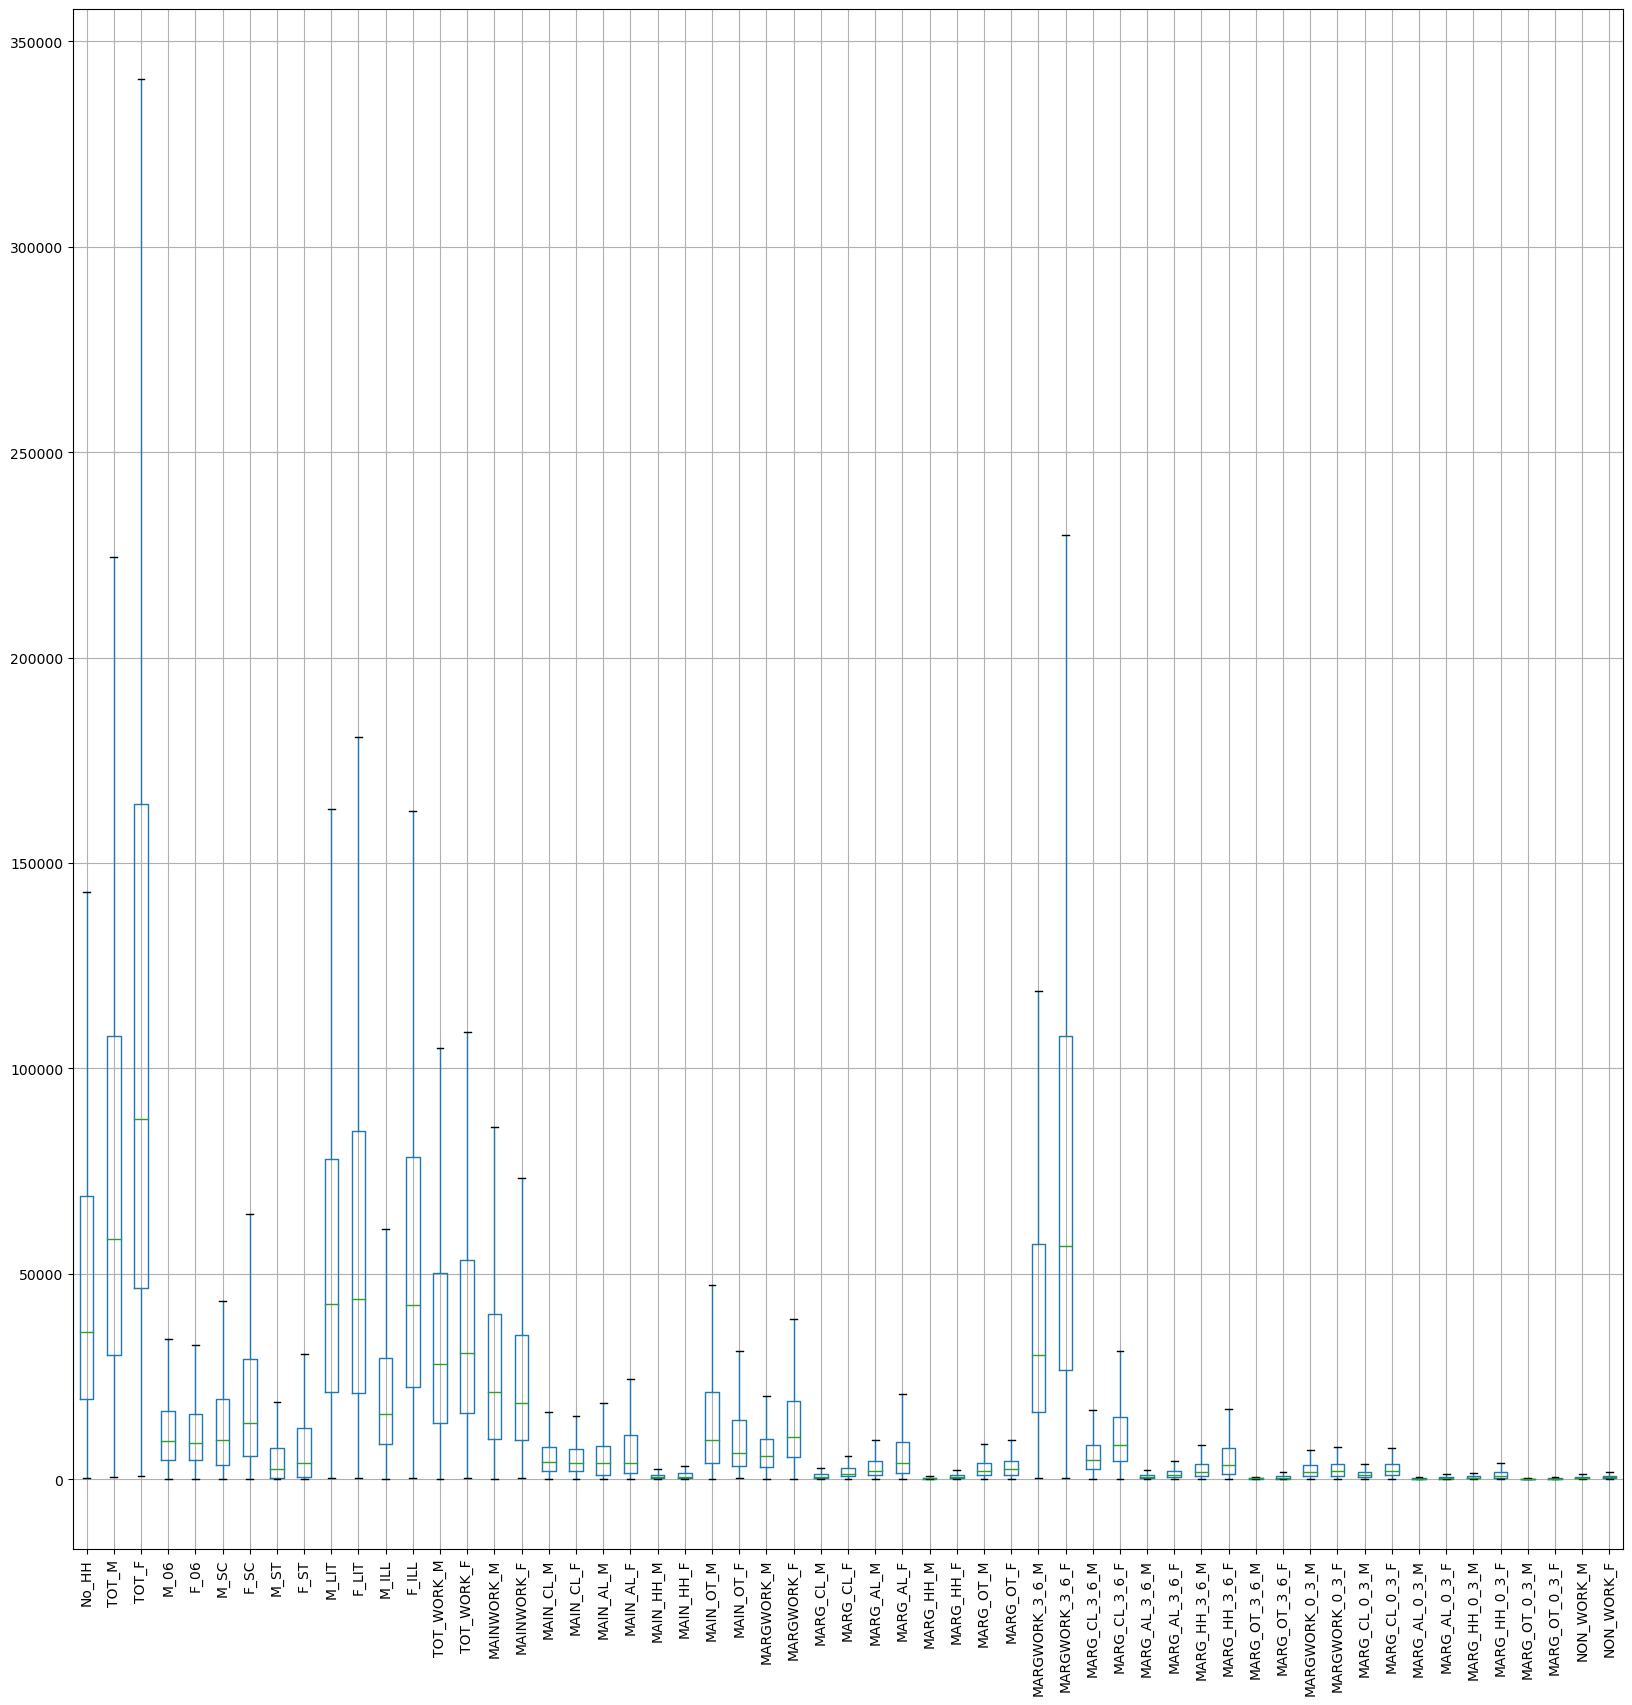

In [117]:
df_num.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [118]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.038986,-0.874837,-0.937027,-0.624685,-0.561282,-1.080201,-1.079963,-0.510440,-0.574198,-0.939617,...,-0.093587,-0.860882,-0.041800,-0.423378,0.523468,-0.793688,-0.443385,-0.756991,-0.497493,-0.774865
1,-1.076896,-0.938023,-1.009723,-0.773932,-0.835657,-1.079873,-1.079635,-0.771833,-0.782092,-1.005083,...,-0.719169,-0.877096,-0.347040,-0.443790,-0.634478,-0.884805,0.358782,0.088391,-0.813235,-0.880662
2,-1.121858,-1.154665,-1.141539,-1.141642,-1.138104,-1.080201,-1.079635,0.122588,0.137599,-1.141561,...,-1.130551,-1.128423,-0.770091,-0.800999,-1.063434,-0.984684,-1.026779,-1.025976,-1.008568,-1.074622
3,-1.201599,-1.217171,-1.214930,-1.197772,-1.176091,-1.080447,-1.079963,-0.399531,-0.437333,-1.203009,...,-1.050477,-1.100286,-0.679055,-0.701491,-1.039994,-0.970666,-0.953855,-0.987550,-0.877454,-1.078541
4,-0.938495,-0.921309,-0.935018,-0.700931,-0.740523,-1.078807,-1.078160,0.432534,0.249489,-0.942767,...,-0.369844,-0.298617,1.484398,1.633130,-0.589942,-0.749882,-0.589234,-0.379131,-0.706204,-0.257637


In [119]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

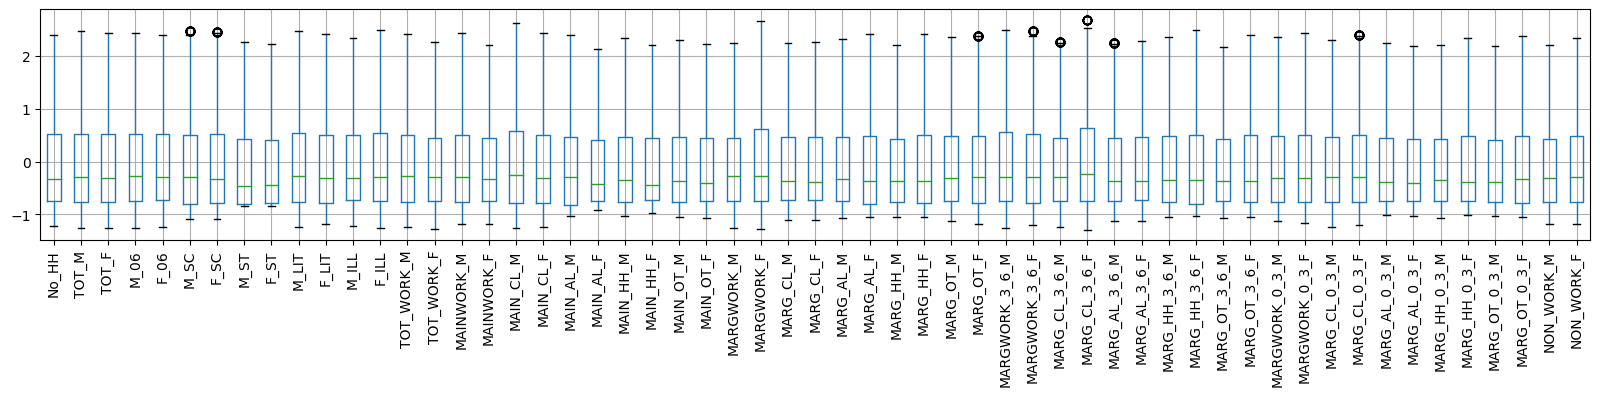

In [120]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

#### H0: All variables in the data are uncorrelated

#### Ha: At least one pair of variables in the data are correlated
#### If the null hypothesis cannot be rejected, then PCA is not advisable.

#### If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [121]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [122]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

### KMO Test

In [123]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

E:\Anaconda\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9361896166652609

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() 

array([[-5.52816148, -5.49201646, -7.47464297, ..., -7.88626804,
        -7.86425952, -7.41622568],
       [ 0.43037756, -0.10611033, -0.21719376, ..., -1.00353656,
        -0.99933799, -1.412143  ],
       [-1.47382694, -2.01564102, -0.2474282 , ..., -0.90928457,
        -0.85156923, -0.8659212 ],
       ...,
       [ 0.53664588, -1.00602985, -0.15004267, ..., -0.04604586,
         0.44181754,  0.5497797 ],
       [-0.3797611 ,  0.28853816, -0.19008603, ...,  0.36152897,
         0.30996831,  0.27715632],
       [-0.26223708, -0.51299573, -0.11832413, ...,  0.0403828 ,
         0.12703613,  0.07148695]])

#### Extract eigen vectors

In [125]:
pca.components_

array([[ 0.14922158,  0.15916917,  0.15820921,  0.15634043,  0.1568144 ,
         0.14335015,  0.14353705,  0.01884873,  0.01787797,  0.15515239,
         0.14544984,  0.1545511 ,  0.15828347,  0.15407627,  0.14252995,
         0.14193201,  0.12573163,  0.11169244,  0.08303496,  0.11929067,
         0.09008881,  0.14184969,  0.13388011,  0.1227618 ,  0.1168656 ,
         0.15665637,  0.14869489,  0.08816344,  0.06516026,  0.1272781 ,
         0.11588826,  0.14536607,  0.14230182,  0.15087675,  0.14801846,
         0.15790761,  0.15583101,  0.15764021,  0.1495015 ,  0.0947852 ,
         0.06715842,  0.12818439,  0.11395923,  0.14510769,  0.14102942,
         0.15092232,  0.14753416,  0.14298675,  0.13378373,  0.06296394,
         0.05674058,  0.11910165,  0.11304417,  0.14213963,  0.14136961,
         0.14762899,  0.14210263],
       [-0.11548673, -0.08023879, -0.09371751, -0.02034061, -0.01431023,
        -0.07966701, -0.08709832,  0.06910144,  0.06731586, -0.10598636,
        -0.13323

#### eigen values

In [126]:
pca.explained_variance_

array([35.64886379,  7.64357559,  3.76919551,  2.77722349,  1.90694892,
        1.1549031 ,  0.98772671,  0.46462979])

In [127]:
var_exp = pca.explained_variance_ratio_

In [128]:
pca.explained_variance_ratio_

array([0.62444145, 0.13388829, 0.06602291, 0.04864709, 0.03340297,
       0.0202298 , 0.01730146, 0.00813866])

#### Scree Plot

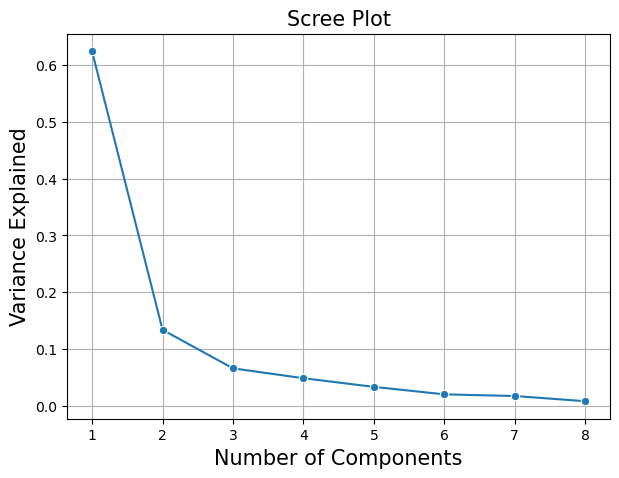

In [129]:
plt.figure(figsize=(7,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [130]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62444145, 0.75832974, 0.82435265, 0.87299974, 0.90640271,
       0.92663251, 0.94393397, 0.95207264])

In [131]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8'],
                                    index = df_num_scaled.columns)

In [132]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090,0.082558,0.106898,-0.099569
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344,0.073667,-0.124085,-0.108870
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927,0.082812,-0.010290,-0.115299
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339,0.092380,-0.200809,-0.132883
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326,0.080010,-0.203413,-0.139288
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893,0.050969,-0.040400,0.189178
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092,0.054568,0.053990,0.177357
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412,-0.231809,-0.355239,-0.071627
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965,-0.214542,-0.327677,-0.078397
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033,0.081378,-0.067062,-0.102881


In [133]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']]

In [134]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.149222,-0.115487,0.101528,0.076814,-0.012090,0.082558,0.106898,-0.099569
TOT_M,0.159169,-0.080239,-0.038662,0.052976,-0.042344,0.073667,-0.124085,-0.108870
TOT_F,0.158209,-0.093718,0.028959,0.070022,-0.022927,0.082812,-0.010290,-0.115299
M_06,0.156340,-0.020341,-0.074419,0.028520,-0.080339,0.092380,-0.200809,-0.132883
F_06,0.156814,-0.014310,-0.068223,0.016398,-0.078326,0.080010,-0.203413,-0.139288
M_SC,0.143350,-0.079667,-0.037619,0.010210,-0.167893,0.050969,-0.040400,0.189178
F_SC,0.143537,-0.087098,0.021350,0.016244,-0.158092,0.054568,0.053990,0.177357
M_ST,0.018849,0.069101,0.323827,0.091143,0.418412,-0.231809,-0.355239,-0.071627
F_ST,0.017878,0.067316,0.338705,0.079554,0.415965,-0.214542,-0.327677,-0.078397
M_LIT,0.155152,-0.105986,-0.032107,0.089187,-0.014033,0.081378,-0.067062,-0.102881


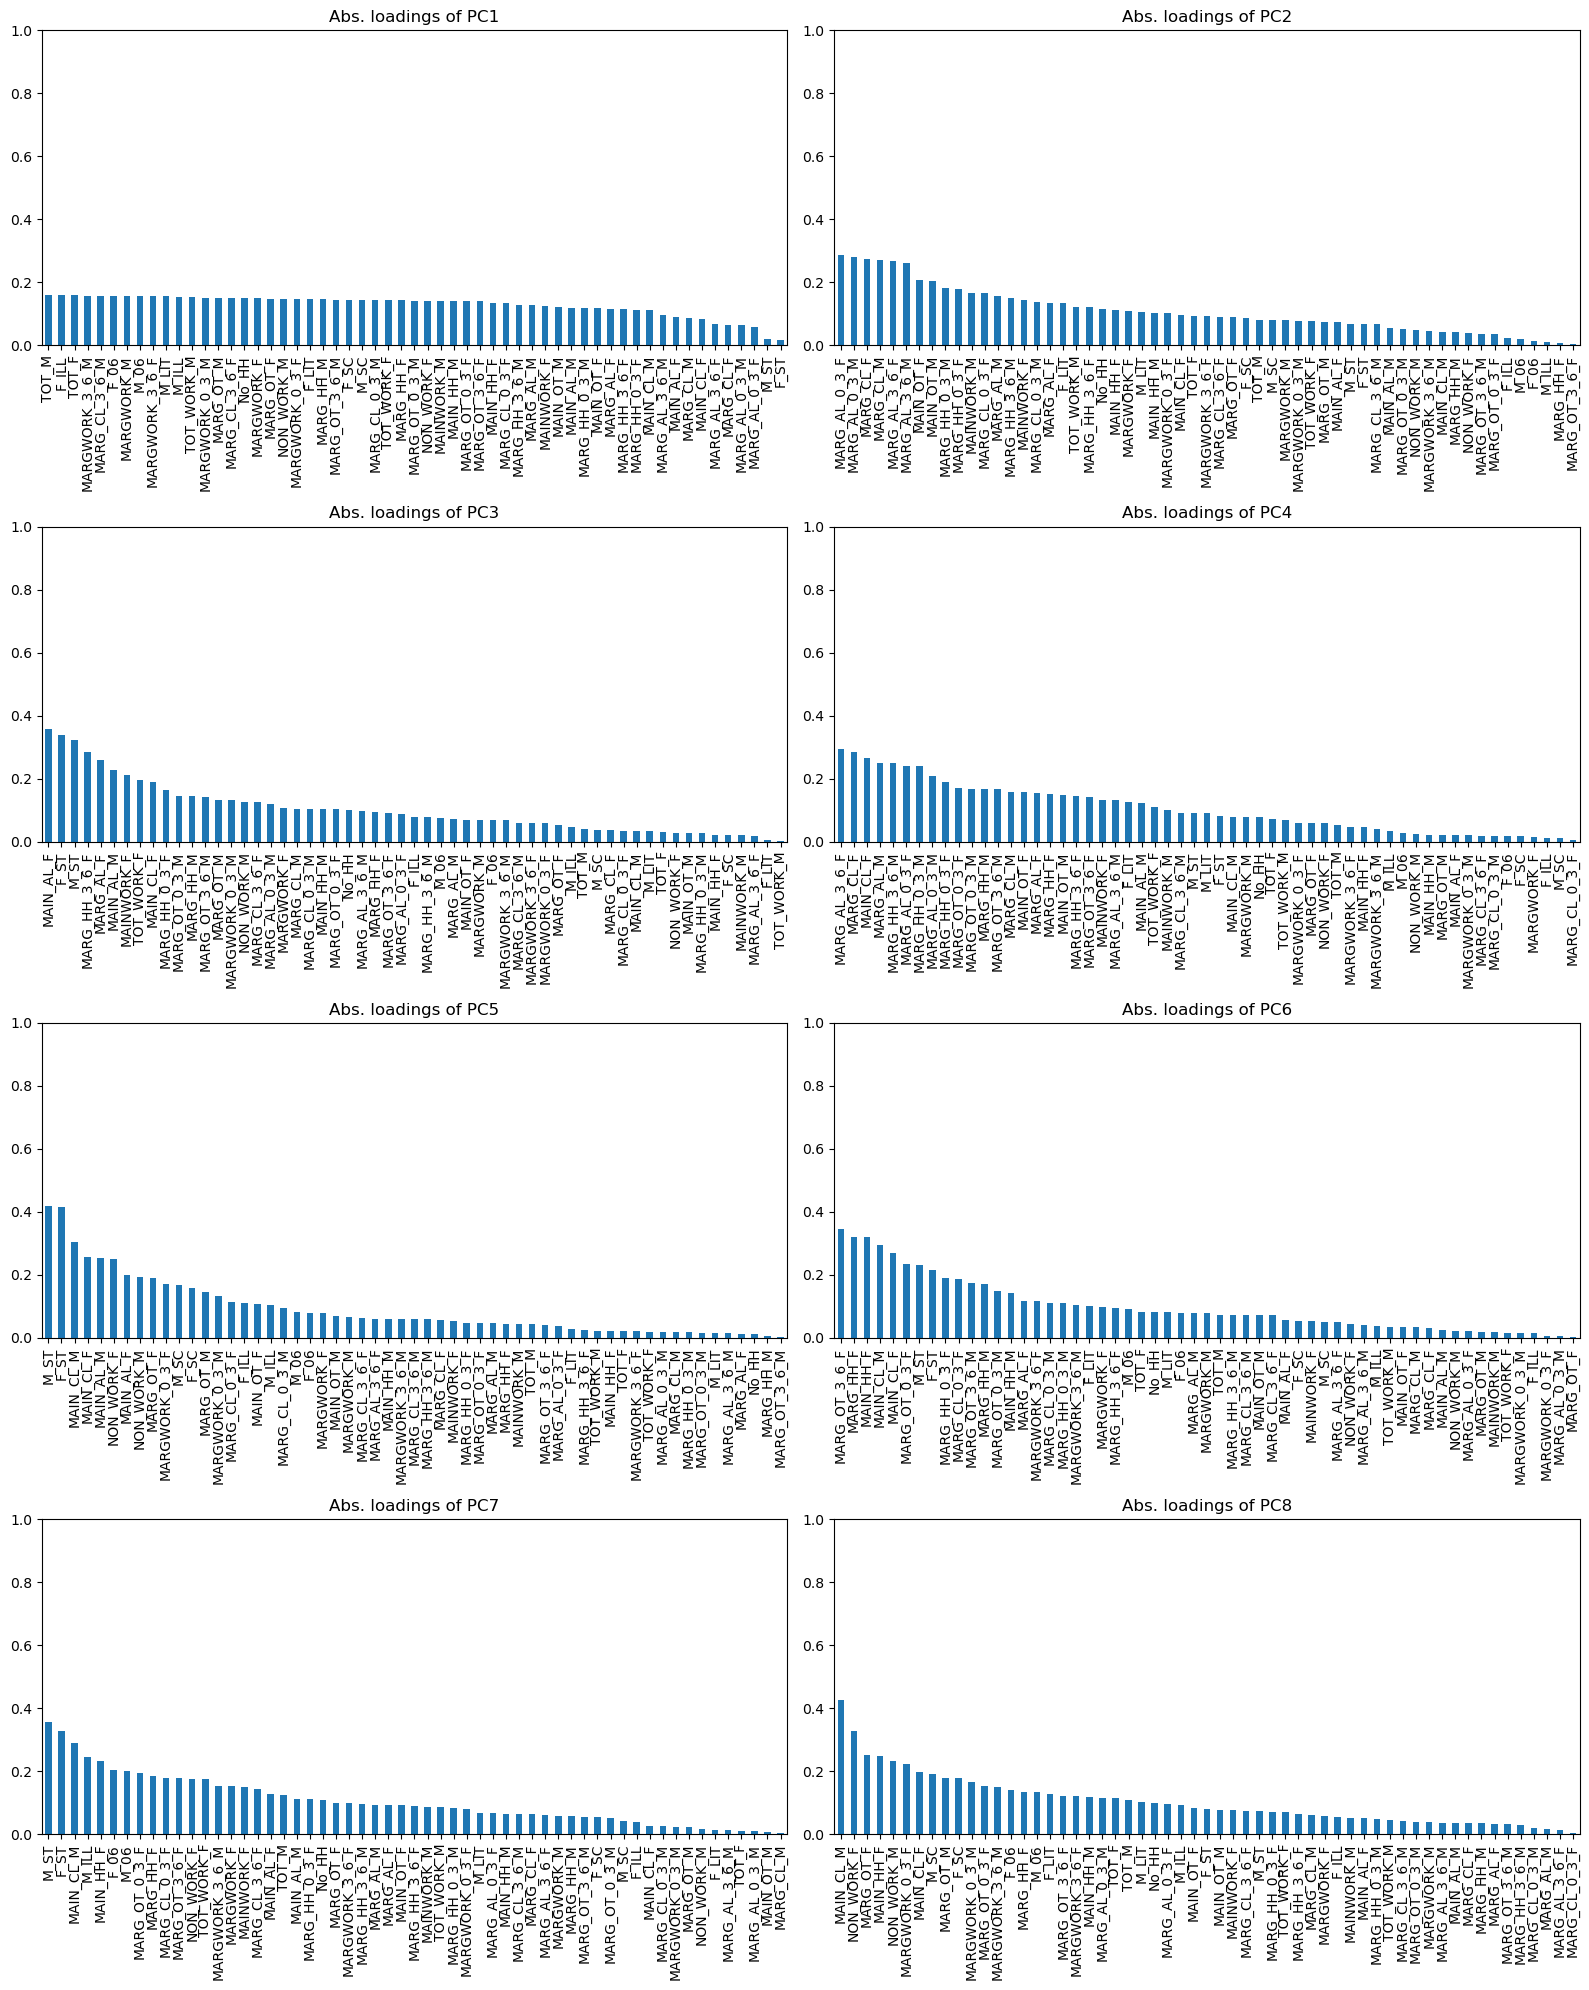

In [135]:
plt.figure(figsize = (16,20))
for i in range(len(df_selected.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

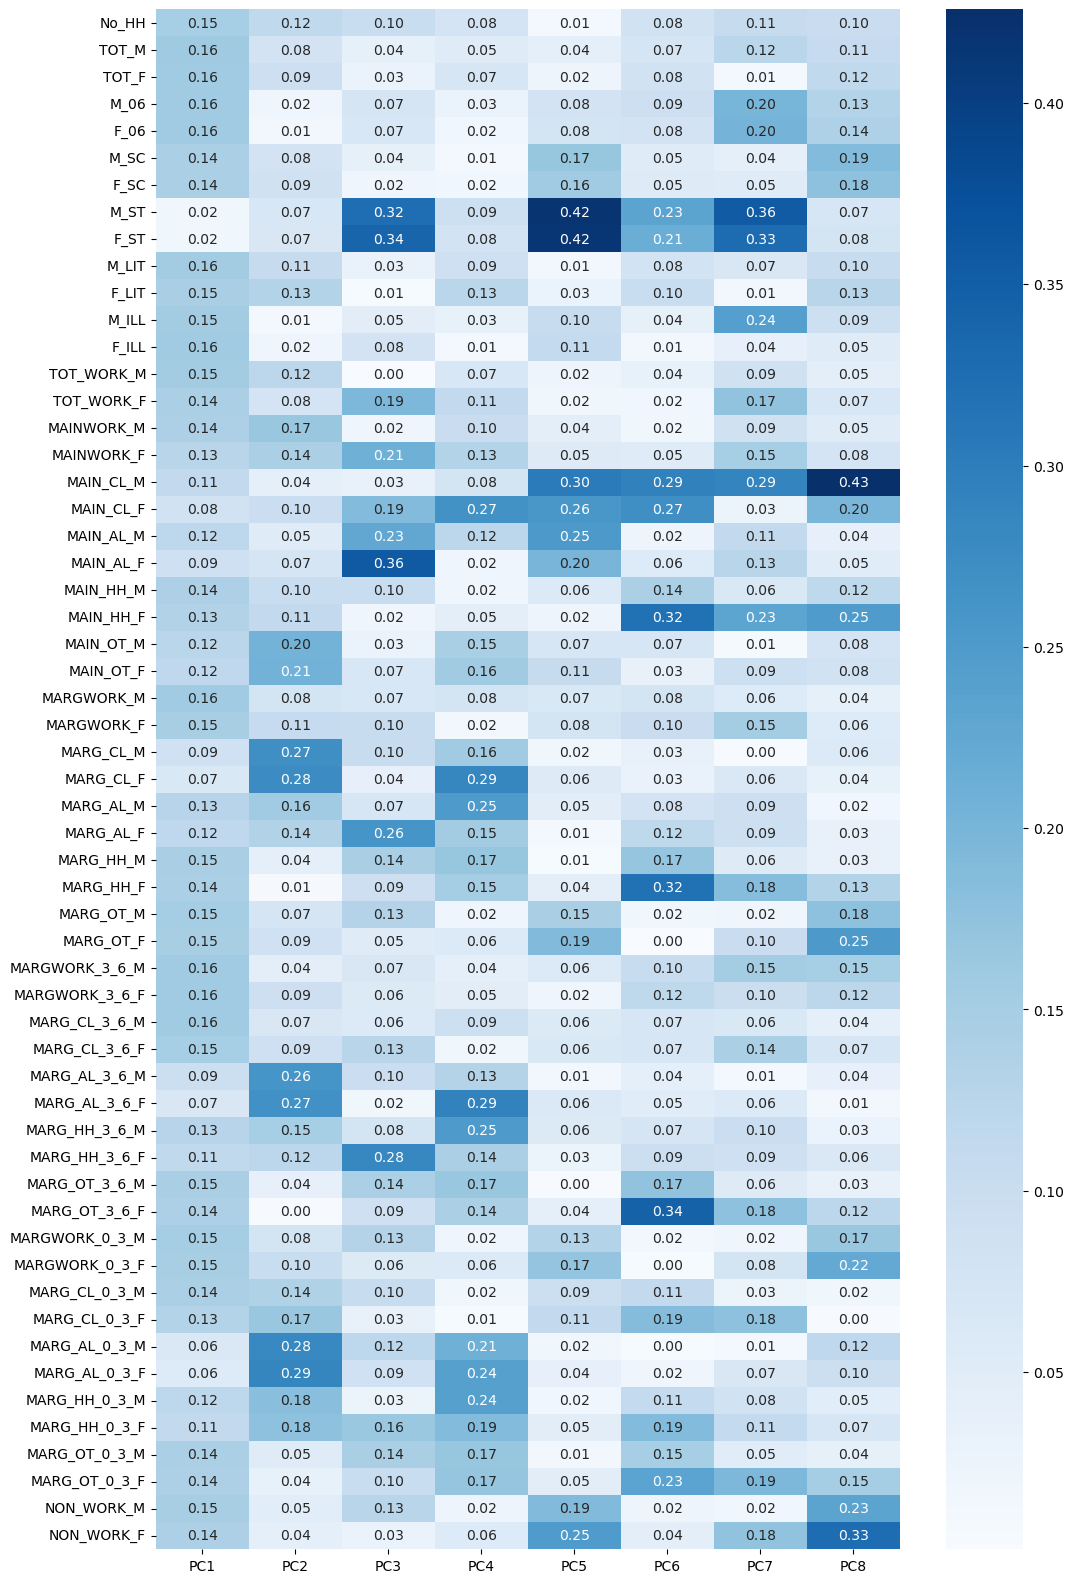

In [136]:
plt.figure(figsize = (12,20))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [137]:
pca = PCA(n_components=8, random_state=123)
pca_final = pca.fit_transform(df_num_scaled)

In [138]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-5.528161,0.430378,-1.473827,-1.278049,0.376357,0.536646,-0.379761,-0.262237
1,-5.492016,-0.106110,-2.015641,-1.750168,-0.006857,-1.006030,0.288538,-0.512996
2,-7.474643,-0.217194,-0.247428,0.006079,0.556282,-0.150043,-0.190086,-0.118324
3,-7.919737,-0.652311,-0.659220,-0.735550,0.272465,0.212950,0.110386,-0.038217
4,-5.175695,2.304059,-1.157327,1.060796,1.080248,-0.050507,0.073167,-0.677111
5,-3.647563,4.598733,-1.742810,3.301079,1.212636,0.172768,0.520964,-0.380329
6,-6.178820,-0.256962,-1.234310,-0.121392,-0.173580,0.496776,-0.030655,-0.005813
7,-5.436802,0.237215,-1.664352,-1.163284,0.220704,0.114504,0.016327,-0.254786
8,-6.099449,0.004985,-1.563508,-1.537818,0.364566,-0.750767,0.496353,-0.277177
9,-4.972562,-1.970847,-1.707058,-0.676605,0.614132,0.087902,0.329290,-0.222228


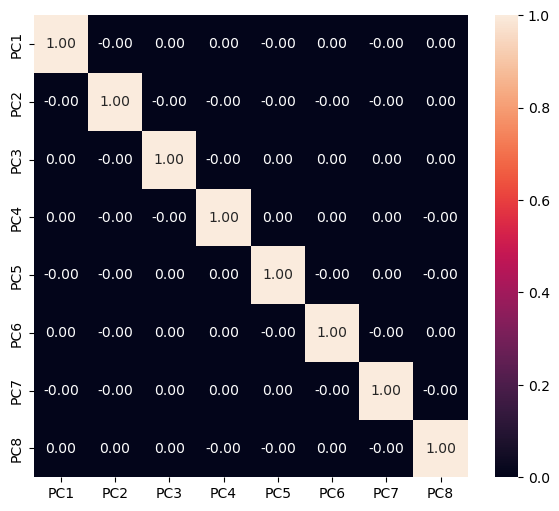

In [139]:
plt.figure(figsize = (7,6))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [140]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_num_scaled.columns[i], end=' + ')

( 0.15 ) * No_HH + ( 0.16 ) * TOT_M + ( 0.16 ) * TOT_F + ( 0.16 ) * M_06 + ( 0.16 ) * F_06 + ( 0.14 ) * M_SC + ( 0.14 ) * F_SC + ( 0.02 ) * M_ST + ( 0.02 ) * F_ST + ( 0.16 ) * M_LIT + ( 0.15 ) * F_LIT + ( 0.15 ) * M_ILL + ( 0.16 ) * F_ILL + ( 0.15 ) * TOT_WORK_M + ( 0.14 ) * TOT_WORK_F + ( 0.14 ) * MAINWORK_M + ( 0.13 ) * MAINWORK_F + ( 0.11 ) * MAIN_CL_M + ( 0.08 ) * MAIN_CL_F + ( 0.12 ) * MAIN_AL_M + ( 0.09 ) * MAIN_AL_F + ( 0.14 ) * MAIN_HH_M + ( 0.13 ) * MAIN_HH_F + ( 0.12 ) * MAIN_OT_M + ( 0.12 ) * MAIN_OT_F + ( 0.16 ) * MARGWORK_M + ( 0.15 ) * MARGWORK_F + ( 0.09 ) * MARG_CL_M + ( 0.07 ) * MARG_CL_F + ( 0.13 ) * MARG_AL_M + ( 0.12 ) * MARG_AL_F + ( 0.15 ) * MARG_HH_M + ( 0.14 ) * MARG_HH_F + ( 0.15 ) * MARG_OT_M + ( 0.15 ) * MARG_OT_F + ( 0.16 ) * MARGWORK_3_6_M + ( 0.16 ) * MARGWORK_3_6_F + ( 0.16 ) * MARG_CL_3_6_M + ( 0.15 ) * MARG_CL_3_6_F + ( 0.09 ) * MARG_AL_3_6_M + ( 0.07 ) * MARG_AL_3_6_F + ( 0.13 ) * MARG_HH_3_6_M + ( 0.11 ) * MARG_HH_3_6_F + ( 0.15 ) * MARG_OT_3_6_M + ( 